In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#import data
df=pd.read_excel('online_retail.xlsx')

In [4]:
#read data
df.head

<bound method NDFrame.head of        Invoice StockCode                          Description  Quantity  \
0       489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1       489434    79323P                   PINK CHERRY LIGHTS        12   
2       489434    79323W                  WHITE CHERRY LIGHTS        12   
3       489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4       489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...        ...       ...                                  ...       ...   
525456  538171     22271                 FELTCRAFT DOLL ROSIE         2   
525457  538171     22750         FELTCRAFT PRINCESS LOLA DOLL         1   
525458  538171     22751       FELTCRAFT PRINCESS OLIVIA DOLL         1   
525459  538171     20970   PINK FLORAL FELTCRAFT SHOULDER BAG         2   
525460  538171     21931               JUMBO STORAGE BAG SUKI         2   

               InvoiceDate  Price  Customer ID         Country  
0   

In [8]:
#data columns
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [11]:
#check dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [10]:
#checking for null values
df.isnull().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [13]:
#check for duplicate values
df.duplicated().sum()

6865

In [14]:
#data stats
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.000000,525461,525461.000000,417534.000000
mean,10.337667,2010-06-28 11:37:36.845017856,4.688834,15360.645478
min,-9600.000000,2009-12-01 07:45:00,-53594.360000,12346.000000
25%,1.000000,2010-03-21 12:20:00,1.250000,13983.000000
50%,3.000000,2010-07-06 09:51:00,2.100000,15311.000000
75%,10.000000,2010-10-15 12:45:00,4.210000,16799.000000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000
std,107.424110,NaN,146.126914,1680.811316


In [16]:
#sample rows
df.sample(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
494007,535644,72816,SET/3 CHRISTMAS DECOUPAGE CANDLES,12,2010-11-28 10:33:00,1.25,17343.0,United Kingdom
395025,527349,21262,WHITE GOOSE FEATHER CHRISTMAS TREE,6,2010-10-15 16:00:00,2.95,16232.0,United Kingdom
110926,500010,C2,CARRIAGE,1,2010-03-04 10:06:00,50.00,13377.0,United Kingdom
157145,504386,22523,CHILDS GARDEN FORK PINK,5,2010-04-13 11:38:00,0.85,14057.0,United Kingdom
226996,511306,72351B,SET/6 PINK BUTTERFLY T-LIGHTS,4,2010-06-07 15:57:00,2.10,17588.0,United Kingdom
313845,519910,15044B,BLUE PAPER PARASOL,6,2010-08-22 13:46:00,2.95,13157.0,United Kingdom
32209,491991,21523,FANCY FONT HOME SWEET HOME DOORMAT,2,2009-12-15 10:10:00,6.75,17809.0,United Kingdom
201086,508731,21524,DOOR MAT SPOTTY HOME SWEET HOME,2,2010-05-18 10:09:00,7.49,15227.0,United Kingdom
33636,492220,84880,WHITE WIRE EGG HOLDER,2,2009-12-15 17:45:00,5.95,17368.0,United Kingdom
346852,523146,22697,GREEN REGENCY TEACUP AND SAUCER,12,2010-09-20 14:39:00,2.95,12455.0,Cyprus


In [17]:
#drop rows with missing values
df_cleaned=df.dropna()

##drop columns with missing values
df_cleaned=df.dropna(axis=1)

In [21]:
#recheck null values
df_cleaned.isnull().sum()



Invoice        0
StockCode      0
Quantity       0
InvoiceDate    0
Price          0
Country        0
dtype: int64

In [23]:
#data shape
df_cleaned.shape

(525461, 6)

In [24]:
#identifying Outliers using ZScore

from scipy import stats

#calculate ZScore of numeric columns
z_score=stats.zscore(df_cleaned.select_dtypes(include=['float64','int64']))

#identify Outliers
df_outliers=df_cleaned[(z_score > 3).any(axis=1)|(z_score < -3).any(axis=1)]

In [25]:
#remove outliers
df_no_outliers=df_cleaned[(z_score < 3).all(axis=1)&(z_score > -3).all(axis=1)]


# Retail Analytics 

### Q.What is the distribution of transaction quantities?

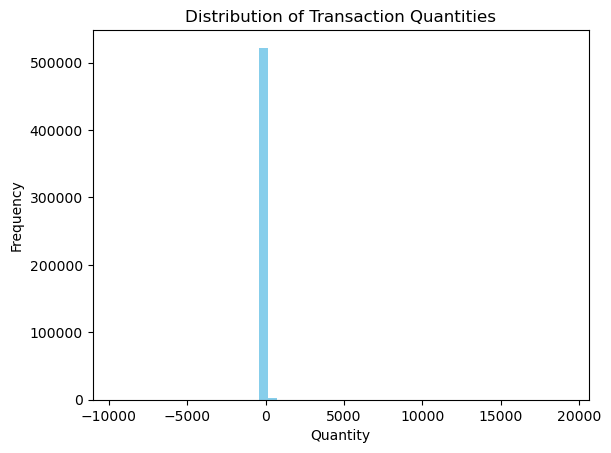

<Figure size 1000x600 with 0 Axes>

In [28]:
#Plotting the distribution of Quantity 
plt.hist(df_cleaned['Quantity'],bins=50,color='skyblue')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.title('Distribution of Transaction Quantities')
plt.figure(figsize=(10,6))
plt.show()

### How are the prices distributed?

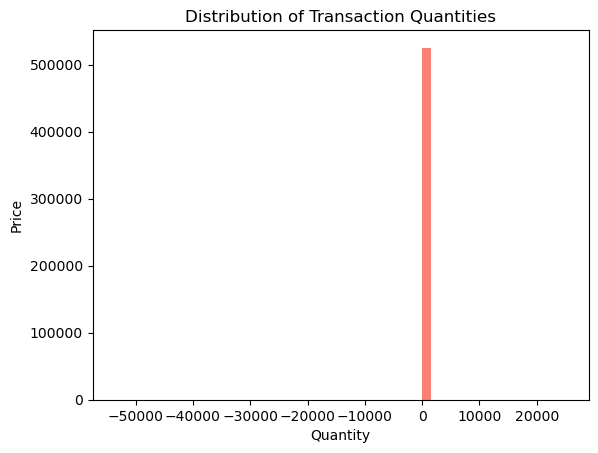

<Figure size 1000x600 with 0 Axes>

In [29]:
#Plotting the distribution of Prices 
plt.hist(df_cleaned['Price'],bins=50,color='salmon')
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.title('Distribution of Transaction Quantities')
plt.figure(figsize=(10,6))
plt.show()

### What are the most common stock codes?

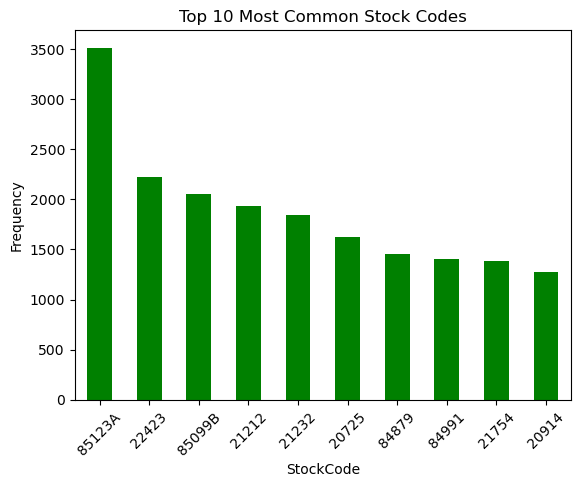

<Figure size 1200x600 with 0 Axes>

In [34]:
stockcodes_counts=df_cleaned['StockCode'].value_counts().head(10)

stockcodes_counts.plot(kind='bar',color='green')
plt.xlabel('StockCode')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.title('Top 10 Most Common Stock Codes')
plt.figure(figsize=(12,6))
plt.show()



### Which countries have the highest sales?

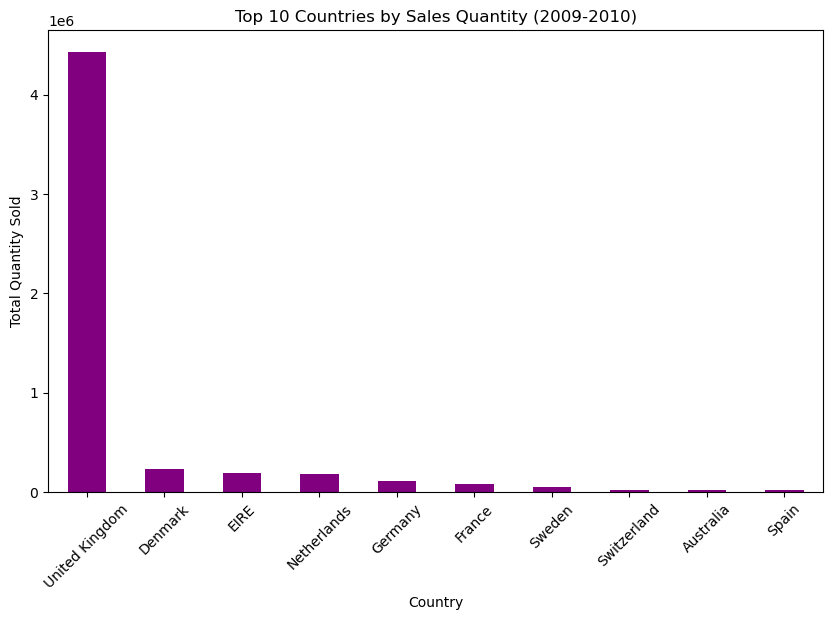

In [36]:
country_sales=df_cleaned.groupby('Country')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
country_sales.plot(kind='bar', color='purple')
plt.title('Top 10 Countries by Sales Quantity (2009-2010)')
plt.xlabel('Country')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.show()

### What is the monthly sales trend

C:\Users\91892\AppData\Local\Temp\ipykernel_10980\3124717052.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])
C:\Users\91892\AppData\Local\Temp\ipykernel_10980\3124717052.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['YearMonth'] = df_cleaned['InvoiceDate'].dt.to_period('M')


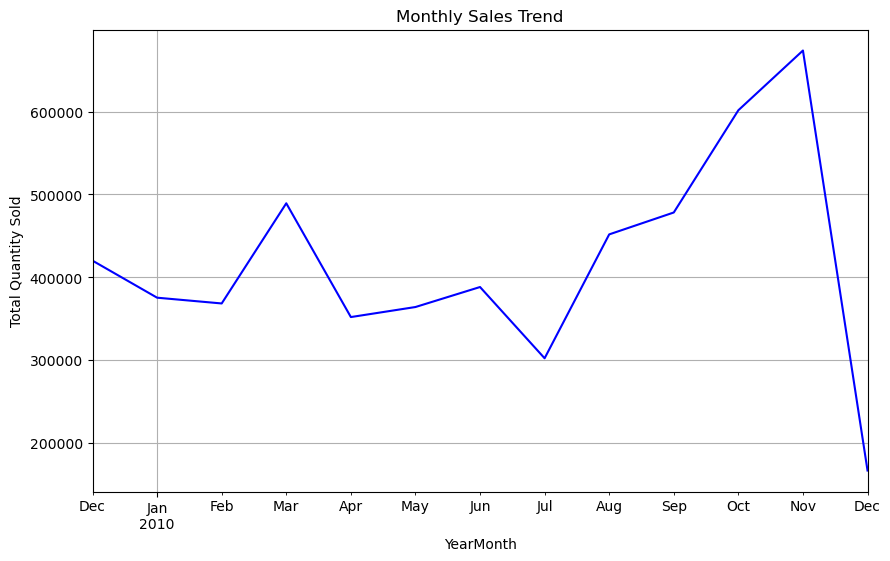

In [39]:
# Convert InvoiceDate to datetime
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])

# Extract year and month
df_cleaned['YearMonth'] = df_cleaned['InvoiceDate'].dt.to_period('M')

monthly_sales = df_cleaned.groupby('YearMonth')['Quantity'].sum()

# Plot for Year 
plt.figure(figsize=(10,6))
monthly_sales.plot(kind='line', color='blue')
plt.title('Monthly Sales Trend')
plt.xlabel('YearMonth')
plt.ylabel('Total Quantity Sold')
plt.grid(True)
plt.show()

### What is the relationship between price and quantity sold?

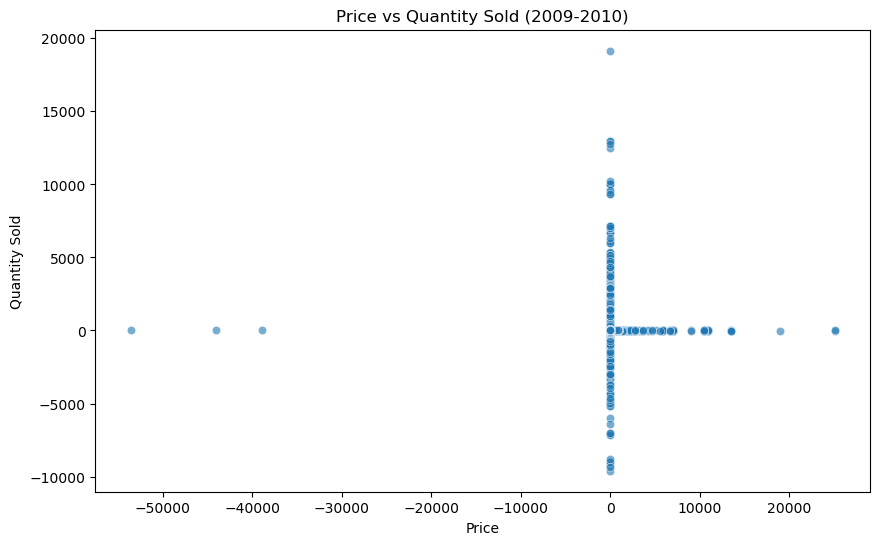

In [40]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_cleaned, x='Price', y='Quantity', alpha=0.6)
plt.title('Price vs Quantity Sold (2009-2010)')
plt.xlabel('Price')
plt.ylabel('Quantity Sold')
plt.show()

### Are there any seasonal trends in sales?

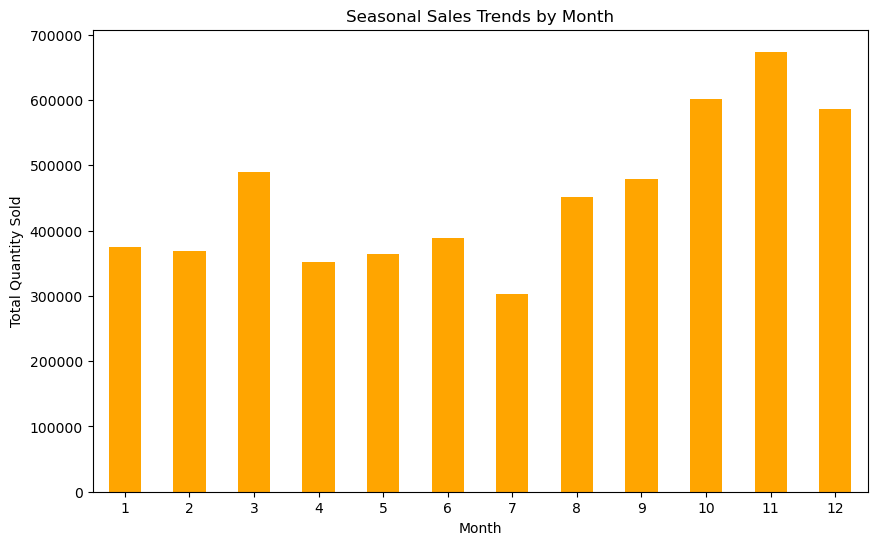

In [41]:
# Extract the month from InvoiceDate
df_cleaned['Month'] = df_cleaned['InvoiceDate'].dt.month

# Group by month and sum up the quantities
monthly_sales = df_cleaned.groupby('Month')['Quantity'].sum()

# Plot seasonal trends 
plt.figure(figsize=(10,6))
monthly_sales.plot(kind='bar', color='orange')
plt.title('Seasonal Sales Trends by Month')
plt.xlabel('Month')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=0)
plt.show()

### Which products have the highest average price?

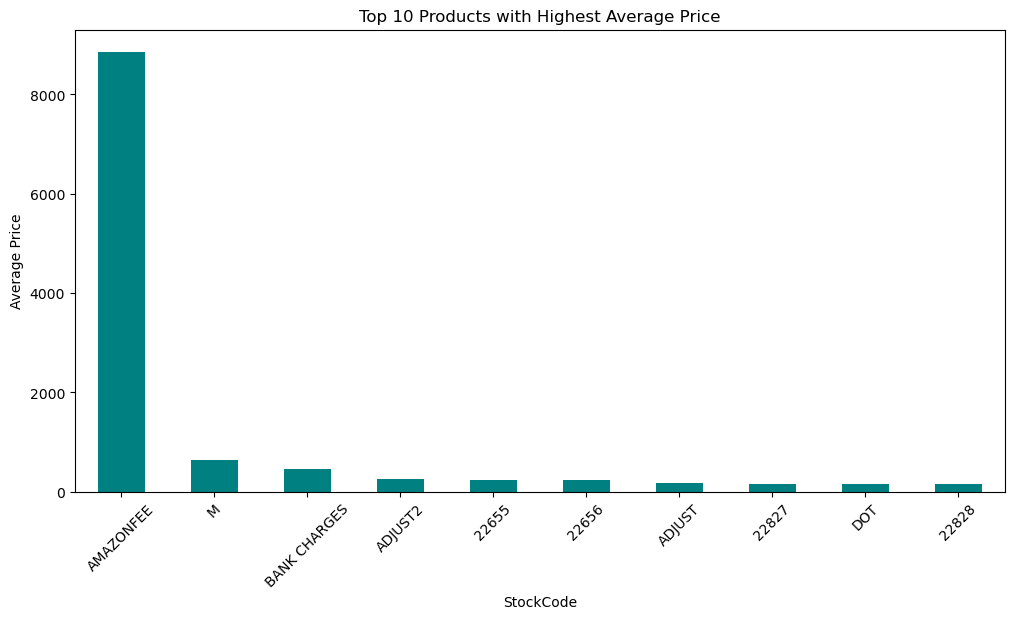

In [42]:
# Calculate average price for each product (StockCode)
avg_price = df_cleaned.groupby('StockCode')['Price'].mean().sort_values(ascending=False).head(10)

# Plot for Year
plt.figure(figsize=(12,6))
avg_price.plot(kind='bar', color='teal')
plt.title('Top 10 Products with Highest Average Price')
plt.xlabel('StockCode')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

### How do sales differ between domestic and international customers?

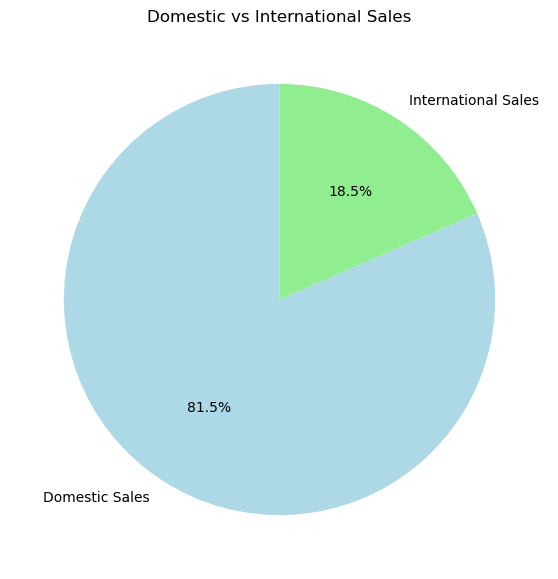

In [44]:
# Assume UK is the domestic country
domestic_sales = df_cleaned[df_cleaned['Country'] == 'United Kingdom']['Quantity'].sum()
international_sales = df_cleaned[df_cleaned['Country'] != 'United Kingdom']['Quantity'].sum()

# Plot for Year
labels = ['Domestic Sales', 'International Sales']
sales = [domestic_sales, international_sales]

plt.figure(figsize=(7,7))
plt.pie(sales, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen'])
plt.title('Domestic vs International Sales')
plt.show()

### How does the total revenue trend over time?

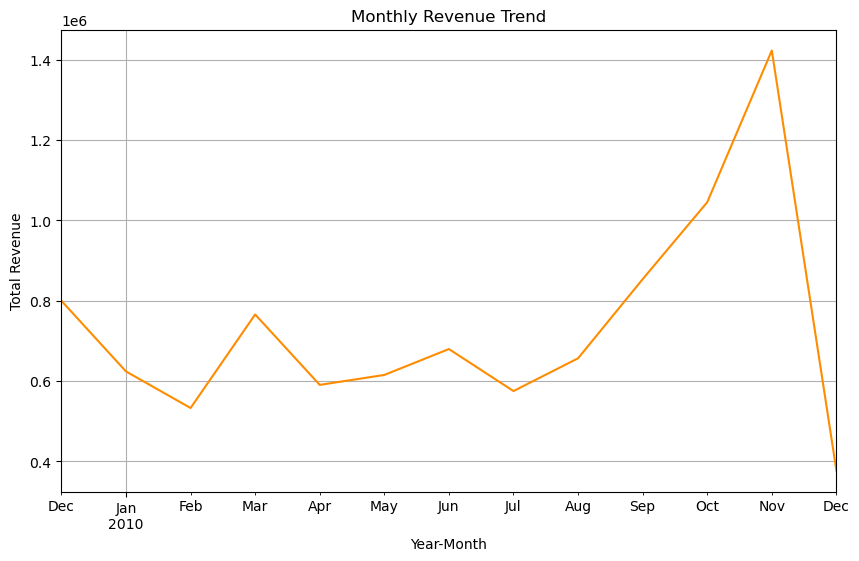

In [45]:
# Add a new column 'Revenue' (Price * Quantity)
df_cleaned['Revenue'] = df_cleaned['Price'] * df_cleaned['Quantity']

# Group by YearMonth and sum the revenue
monthly_revenue = df_cleaned.groupby('YearMonth')['Revenue'].sum()

# Plot for Year 
plt.figure(figsize=(10,6))
monthly_revenue.plot(kind='line', color='darkorange')
plt.title('Monthly Revenue Trend')
plt.xlabel('Year-Month')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()

### Which countries contribute the most to sales?

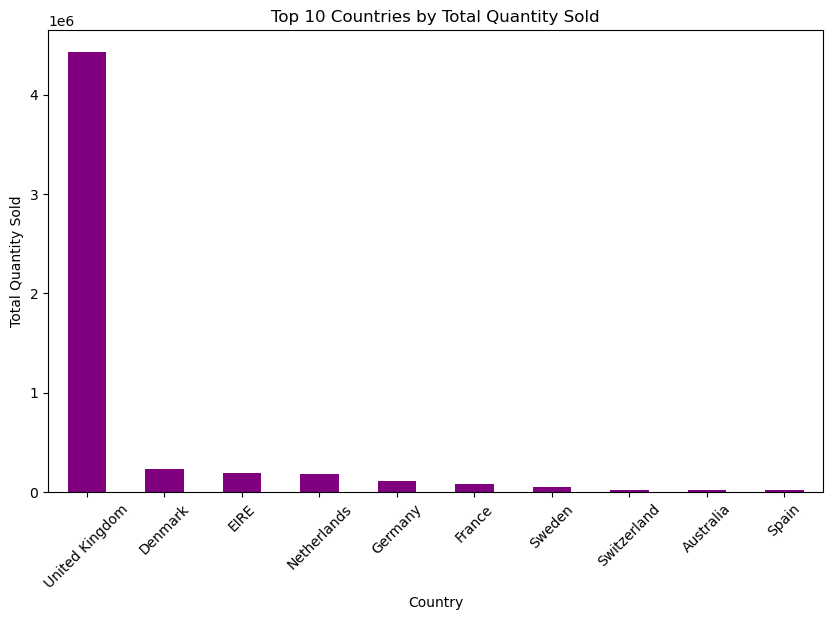

In [46]:
# Group by Country and sum the Quantity for both datasets
sales_by_country = df_cleaned.groupby('Country')['Quantity'].sum().sort_values(ascending=False).head(10)

# Plot for Year
plt.figure(figsize=(10,6))
sales_by_country.plot(kind='bar', color='purple')
plt.title('Top 10 Countries by Total Quantity Sold')
plt.xlabel('Country')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.show()

### How do the top-selling products differ between the two years?

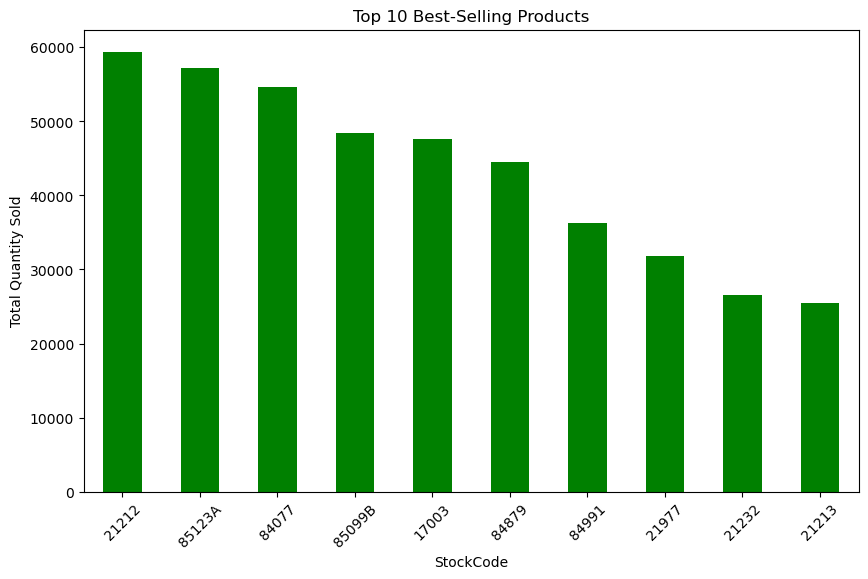

In [47]:
# Group by StockCode and sum the Quantity for both datasets
top_products = df_cleaned.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).head(10)

# Plot for Year 
plt.figure(figsize=(10,6))
top_products.plot(kind='bar', color='green')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('StockCode')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.show()

### What is the distribution of sales per invoice?

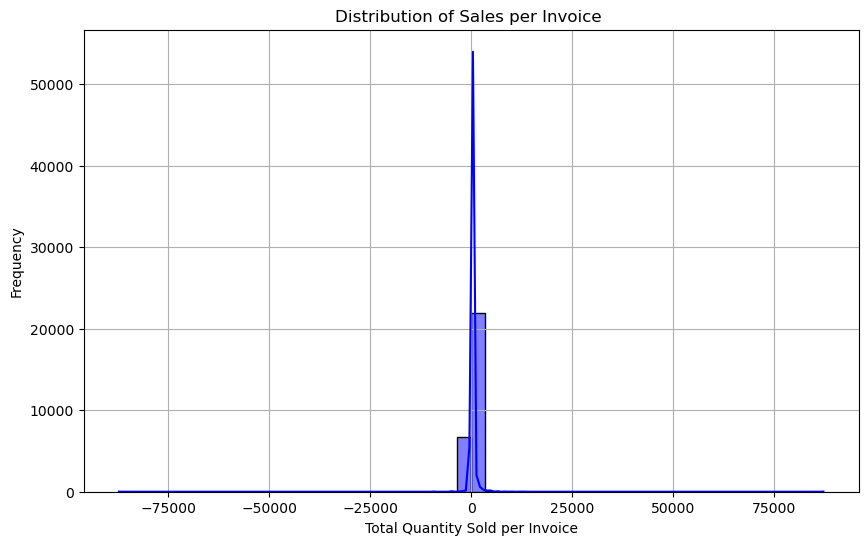

In [48]:
# Calculate sales per invoice by summing Quantity for each Invoice
sales_per_invoice = df_cleaned.groupby('Invoice')['Quantity'].sum()

# Plot for Year 
plt.figure(figsize=(10,6))
sns.histplot(sales_per_invoice, bins=50, kde=True, color='blue')
plt.title('Distribution of Sales per Invoice ')
plt.xlabel('Total Quantity Sold per Invoice')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### How does the distribution of invoice dates vary?

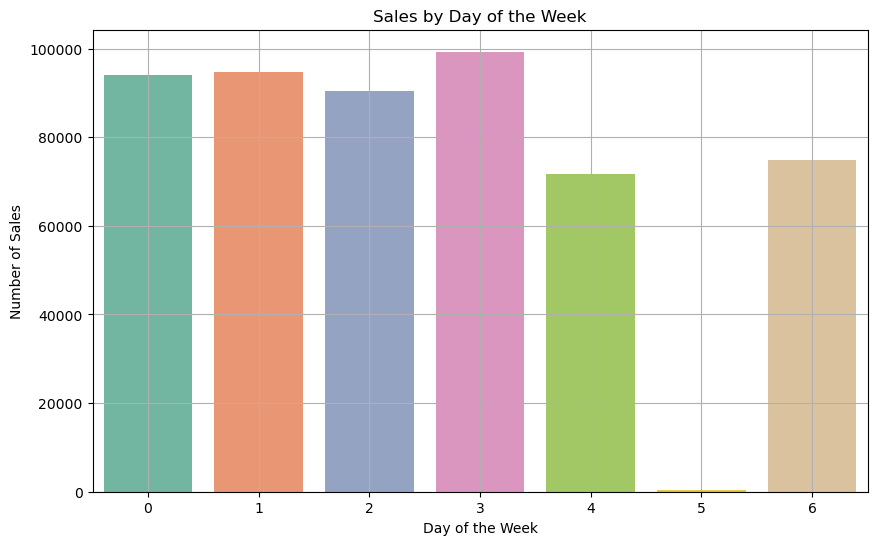

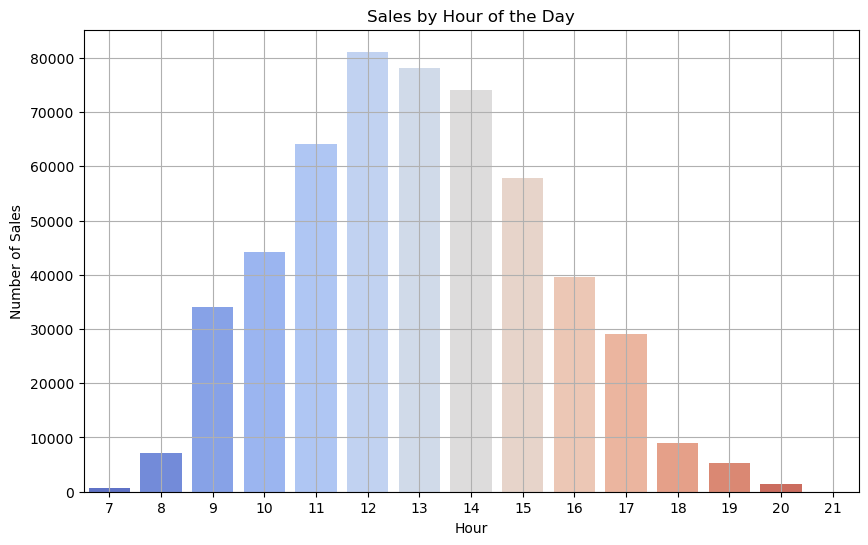

In [54]:
# Extract the day of the week and hour from the InvoiceDate column
df_cleaned['DayOfWeek'] = df_cleaned['InvoiceDate'].dt.dayofweek

df_cleaned['Hour'] = df_cleaned['InvoiceDate'].dt.hour

# Plot distribution of sales by day of the week (0 = Monday, 6 = Sunday)
plt.figure(figsize=(10,6))
sns.countplot(x='DayOfWeek', data=df_cleaned, palette='Set2')
plt.title('Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Sales')
plt.grid(True)
plt.show()

# Plot distribution of sales by hour of the day
plt.figure(figsize=(10,6))
sns.countplot(x='Hour', data=df_cleaned, palette='coolwarm')
plt.title('Sales by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Number of Sales')
plt.grid(True)
plt.show()

### What is the proportion of sales per country?

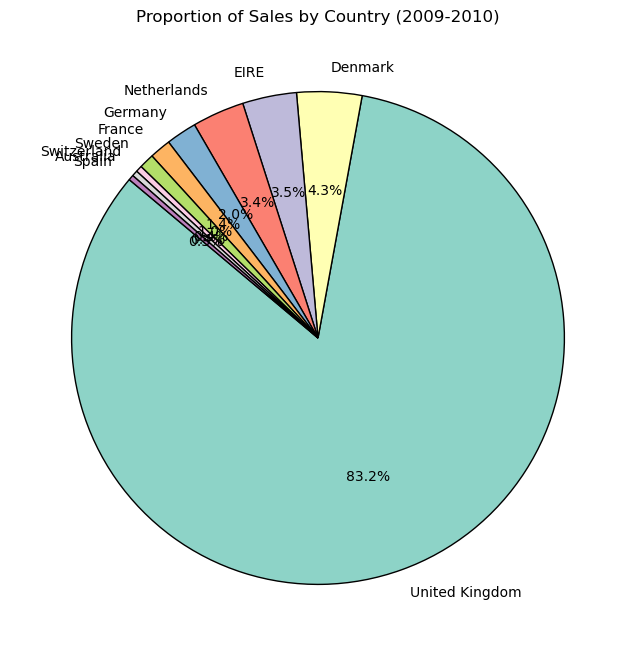

In [56]:
# Aggregate sales by country for 2009-2010
sales_by_country = df_cleaned.groupby('Country')['Quantity'].sum().sort_values(ascending=False)

# Plot a multi-colored pie chart for the top 10 countries
plt.figure(figsize=(10,8))
colors = sns.color_palette('Set3', len(sales_by_country.head(10)))  # Choosing a nice color palette
sales_by_country.head(10).plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'edgecolor': 'black'})

plt.title('Proportion of Sales by Country (2009-2010)')
plt.ylabel('')  # Hides the y-label
plt.show()

### What are the relationships between variables? (Pairplot Analysis)

C:\Users\91892\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x800 with 0 Axes>

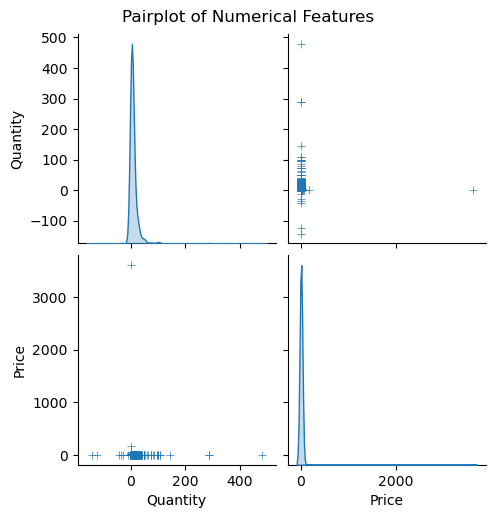

In [57]:
# Select relevant numerical columns for pairplot
numeric_columns = df_cleaned[['Quantity', 'Price']]

# Plot a pairplot with hue by Country (for large datasets, we sample for better performance)
plt.figure(figsize=(8,8))
sns.pairplot(numeric_columns.sample(1000), diag_kind='kde', markers='+')
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()